### 데이터 분석

저항성이 있는 중위수를 통계량으로 사용하고, 잔차로 데이터를 분석하며, 데이터를 대칭화하거나 산포를 비슷하게 만들고, 그래픽으로 표현하여 탐색한다.

### 기본 설정

In [ ]:
read.table("directory", header = TRUE)  ## read뒤에 자료형을 붙여준다.

In [ ]:
library(aplpack)  ## stem. backback
library(MASS)
library(ggplot2)

### 2. 줄기-잎 그림

`-` 장점

1. 사분위수나 중앙값을 찾기 쉬움
2. 분포의 전체적인 모양을 쉽게 알 수 있음
3. 이상치 유무 파악이 용이함

`-` 단점

1. 자료가 많은 경우 부적합

`-` 히스토그램과의 비교

* 정보가 손실되지 않음
* 원자료 없이 줄기의 수를 바로 바꿀 수 있음
* 구간의 폭을 임의로 조정할 수 없음

`-` 취득 가능 정보

* 군집의 수(솟은 지점) / 집중도
* 대칭성
* 자료의 범위 및 산포
* 특이점의 존재 여부
  
> 대체로 히스토그램과 유사하다고 보면 된다.

In [ ]:
stem(data, scale = double)  ## scale default = 1

In [34]:
install.packages("aplpack")
library(aplpack)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
## "aplpack" 라이브러리
stem.leaf.backback(a, b)  ## 벡터를 넣어주면 마주보는 줄기-잎 그림을 그려준다.

### 3. 수치요약 / 상자그림

`-` 다섯 수치의 요약 : 최소값, 아래경첩, 중위수, 위경첩, 최대값

`-` 중위수의 깊이 $d(M) = [(N+1)/2]$, 단, $[x] = x$를 넘지 않는 최대의 정수

`-` 경첩과 분위수

> $p(k) = \frac{k - \frac{1}{3}}{N + \frac13}$ : k번째 자료의 누적비율
>
> $k(p) = Np + \frac{p}3 + \frac13$ : p% 자료, 보간법은 저항성이 높다.


$$w = k(p) - k_1(p) \Rightarrow q_p = (1-w)×k_1(p) + w×k_2(p)$$

> $k(p)$를 구하고, 소수부분을 뗀 뒤, 큰 정수에 그만큼 가중치를 주고 작은 정수에는 1에서 그만큼을 뺀 만큼 가중치를 주어 더한다.

In [ ]:
quantile(vector, quantile vector, type = int)
## 관측치의 벡터, 산출할 분위수의 비율값, 계산 방식을 넣어주면 분위수 산출
## type = 8이 보간법을 이용하여 산출함. Np + p/3 + 1/3

apply(data.frame(L, U), 1, mean)  ## df.apply(function, axis = 0)느낌

`-` 문자값 전시

||문자값|mid|spr|
|:-:|:-:|:-:|:-:|
|M|$M$|$M$|0|
|H|$H_L, ~ H_U$|$\frac{H_L + H_U}{2}$|$H_U - H_L$|
|E|$E_L, ~ E_U$|$\frac{E_L + E_U}{2}$|$E_U - E_L$|
|D|$D_L, ~ D_U$|$\frac{D_L + D_U}{2}$|$D_U - D_L$|

`-` 왜도와 첨도

$Skewness = \frac{(H_U - M) - (M - H_L)}{(H_U - M) + (M - H_L)}$

$Kurto_{E/H} = \frac{E_U-E_L}{H_U-H_L} - 1.704 = \frac{spr(E)}{spr(H)} - 1.704$

$Kurto_{D/E} = \frac{D_U-D_L}{E_U-E_L} - 2.274 = \frac{spr(D)}{spr(E)} - 2.274$

> 첨도의 경우 수가 클수록 외곽 값이 멀리있고 가운데 값이 좁게 있다는 뜻이므로 솟아있음.
>
> 정규분포에서는 왜도와 첨도 모두 0

`-` 이중지수분포

$$f(x) = \frac{\lambda}{2} e^{-\lambda|x-\mu|} I(-\inf<x<\inf)$$

> 한쪽 방향으로 적분 후 비율을 이용

`-` 상자 그림 작성 순서

1. 다섯 수치 요약을 구한다. (최소값, 아래경첩, 중앙값, 위경첩, 최대값)
2. 위 아래 경첩에 해당하는 위치에 상자를 그리고, 상자 내에 중앙값을 표시한다.
3. 양쪽 안울타리 값(Inner Fance)을 계산하고,
   > $IF_L = H_L - 1.5spr(H)$
   >
   > $IF_U = H_U + 1.5spr(H)$

    양쪽 안울타리 안쪽에 있으면서 경계에 가장 가까운 값(Adjecent Value)을 찾고, 인접값과 상자의 양끝을 줄로 연결한다.
4. 안울타리 바깥에 있는 자료를 특이값으로 간주하고 점으로 표시한다.

In [ ]:
boxplot(y~x, data = data.frame)

`-` 움푹 패인 상자 그림 Notched box-plot

> 중위수의 CI를 표시한 그림이다. $CI = M ± \frac{1.58 IQR}{\sqrt{n}}$, 그림의 패인 부분이 겹치면, 중앙값이 다르다고 할 수 없다.(검정)

In [ ]:
boxplot(y~x, data = data.frame, notch = TRUE)

`-` `ggplot2`를 이용한 시각화

In [21]:
library(ggplot2)
data(iris)
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


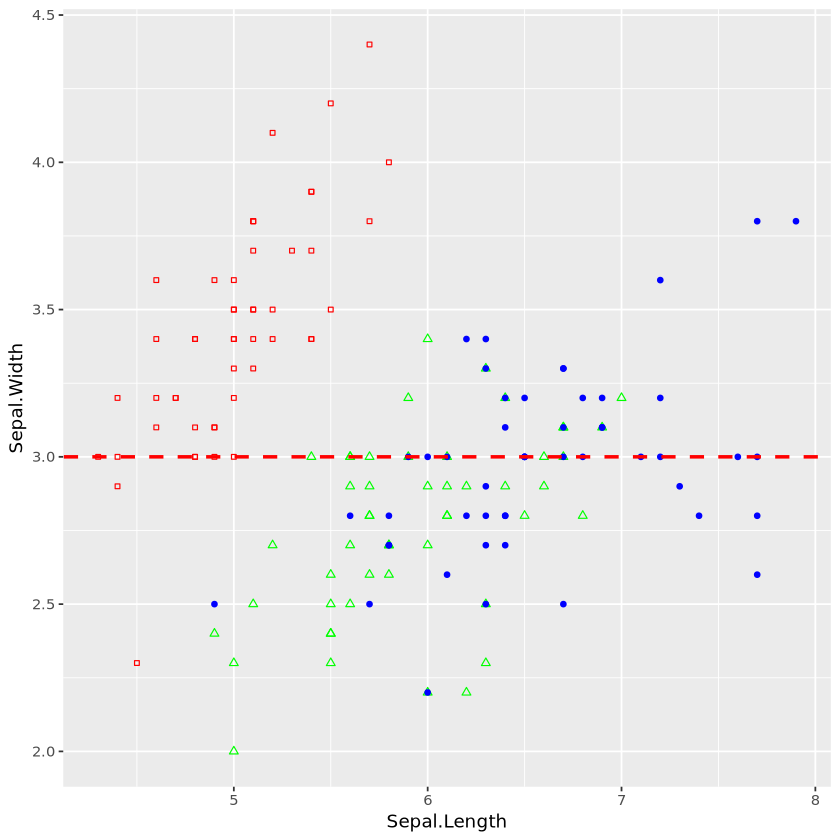

In [10]:
ggplot(iris, aes(Sepal.Length, Sepal.Width)) +  ## x와 y의 열이름
 geom_point(col = c("red", "green", "blue")[iris$Species], pch = c(0,2,20)[iris$Species],
            cex = c(1, 1.5, 2)[iris$Species]) + ## geom_jitter를 대신 입력 가능(퍼지게)
 geom_abline(slope = 0, intercept = 3, col = "red", lwd = 1, lty = 2)

In [8]:
factor(c("a", "b", "c"), levels = c("a", "b", "c"))
c(1,2,3)[factor(c("a","b","b","c","c","c"), levels = c("a", "b", "c"))]  ## 순서있는 범주형의 경우 슬라이싱 가능

[1] 1 2 2 3 3 3

`-` 바이올린 플롯

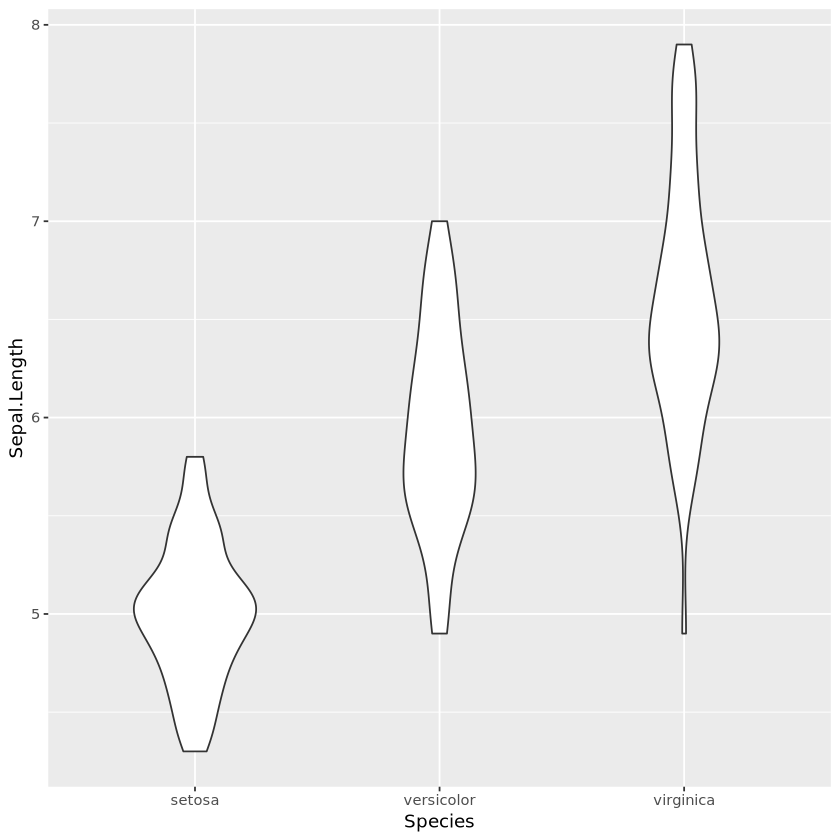

In [32]:
ggplot(iris, aes(Species, Sepal.Length)) +
 geom_violin(width = 0.5)

### 4. 자료의 재표현

`-` 분포의 대칭화

> 대푯값이 의미를 가지도록 만들어준다.

|변환|대칭인 분포의 변화|사용처|
|-|-|-|
|선형|변화 없음||
|제곱|오른쪽으로 기울어짐|왼쪽으로 기울어졌을 때|
|네제곱|심하게 오른쪽으로 기울어짐|심하게 왼쪽으로 기울어졌을 때|
|제곱근|왼쪽으로 기울어짐|오른쪽으로 기울어졌을 때|
|네제곱근|심하게 왼쪽으로 기울어짐|심하게 오른쪽으로 기울어졌을 때|
|지수|극심하게 오른쪽으로 기울어짐|극심하게 왼쪽으로 기울어졌을 때|
|대수|극심하게 왼쪽으로 기울어짐|극심하게 오른쪽으로 기울어졌을 때|

`-` 변수 사이의 관계를 단순화(직선화)

> 변환을 시켰을 때, 모형의 성능이 개선될 수 있고, 결과의 해석이 편리해질 수 있다.

`-` 그룹 간 산포를 비슷하게 만듦

> 분산 안정화 변환 : 제곱근 변환으로 포아송분포의 분산을 상수로 만들 수 있다.

In [36]:
library(MASS)
data(Animals)
abbreviate(rownames(Animals))  ## 행의 이름을 요약함

Mountain beaver              Cow        Grey wolf             Goat 
          "Mntb"            "Cow"           "Gryw"           "Goat" 
      Guinea pig      Dipliodocus   Asian elephant           Donkey 
          "Gnpg"           "Dpld"           "Asne"           "Dnky" 
           Horse     Potar monkey              Cat          Giraffe 
          "Hors"           "Ptrm"            "Cat"           "Grff" 
         Gorilla            Human African elephant      Triceratops 
          "Grll"           "Humn"           "Afre"           "Trcr" 
   Rhesus monkey         Kangaroo   Golden hamster            Mouse 
          "Rhsm"           "Kngr"           "Gldh"           "Mous" 
          Rabbit            Sheep           Jaguar       Chimpanzee 
          "Rbbt"           "Shep"           "Jagr"           "Chmp" 
             Rat    Brachiosaurus             Mole              Pig 
           "Rat"           "Brch"           "Mole"            "Pig"

`-` 로버스트 회귀

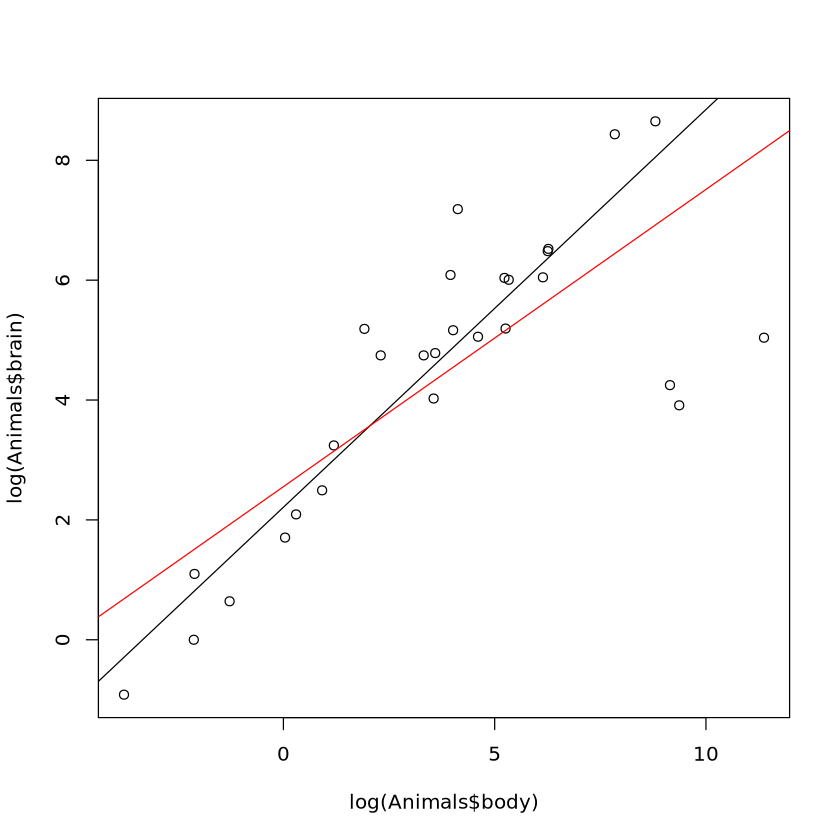

In [41]:
m1 <- lm(log(Animals$brain)~log(Animals$body))
m2 <- rlm(log(Animals$brain)~log(Animals$body))

plot(log(Animals$brain)~log(Animals$body))
abline(m2)
abline(m1, col = "red")

> 로버스트 회귀는 저항성이 더 크기 때문에 이상치에 영향을 적게 받는다.

`-` 표준화 변환 : 확률변수에 대한 선형 변환

$$\tilde{Z_i} = \frac{x_i - med_x}{\tilde{\sigma_x}},~\tilde{\sigma_x} = IQR/1.35$$

> 중위수와 유사 표준편차를 사용

`-` Box-Cox transform

$$p \approx 1 - \frac{\frac{H_L + H_U}{2} - M}{\frac{(H_L - M)^2 + (H_U - M)^2}{4M}}$$

`-` 모든 집단의 산포를 균일하게 만드는 변환

$$log(spr(H)) \approx (1-p) log(M) + log(상수) - log(p)$$

> 위 식에서 $log(M)$을 x,  $log(spr(H))$를 y에 두고 플롯하면 직선이 유도되는데, 해당 직선의 기울기인 (1-p)에서 p값을 유도할 수 있다.

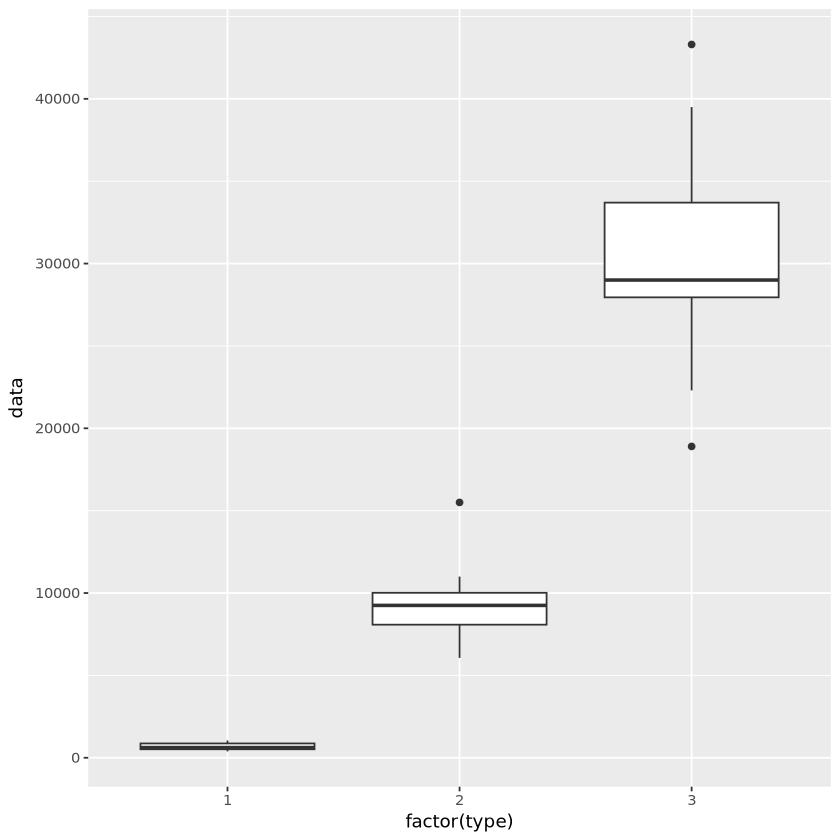

In [42]:
library(ggplot2)

type<-rep(1:3,c(11,11,11))
data<-c(387, 470,497,537,540,620,760,845,895,1020,1050, 6060,7600,7900,8260,8900,9250,9650,9830,10200,11000,15500, 18900,22300,27800,28100,28800,29000,31400,32800,34600,39500,43300)

plank <- data.frame(type, data)

ggplot(plank, aes(factor(type), data)) +
    geom_boxplot()

> 분포가 다른 세 집단이 있을 때....

In [46]:
A1 <- plank[(plank$type == 1),2]
A2 <- plank[(plank$type == 2),2]
A3 <- plank[(plank$type == 3),2]

In [59]:
num1 <- fivenum(A1); num2 <- fivenum(A2); num3 <- fivenum(A3)

df <- data.frame(num1, num2, num3)
spr_trans <- log(df[4,] - df[2,])
med_trans <- log(df[3,])

In [72]:
model <- lm(t(spr_trans)~t(med_trans))
1-model$coef[2]

t(med_trans) 
   0.2916456

> 적당한 기울기는 0.2916임을 알 수 있다.

### 5. 확률플롯의 활용

`-` $\chi^2 - test$

$$T = \Sigma\frac{O_i - E_i}{E_i} \sim \chi^2(k-c-1)$$

> k : 구간의 수, c : 표본으로 추정된 모수의 개수, $H_0 : $ 표본이 해당 분포를 따른다.(기각하면 안됨)

`-` P-P plot

$$(\frac{i - 0.5}{n}, \Phi(x_{(i)}))$$

`-` Q-Q plot

$$(x_{(i)}, \Phi^{-1}(\frac{i - 0.5}{n}))$$

* 일반적으로 확률플롯의 관계를 다음과 같이 나타낼 수 있다.

$$(F^{-1}(p_i), q_i)$$

위 산점도가 직선으로 나타나면 분포가 같다고 할 수 있다.

In [17]:
n = 100
p_i <- seq(0.5/n, (n-0.5)/n, length = n)

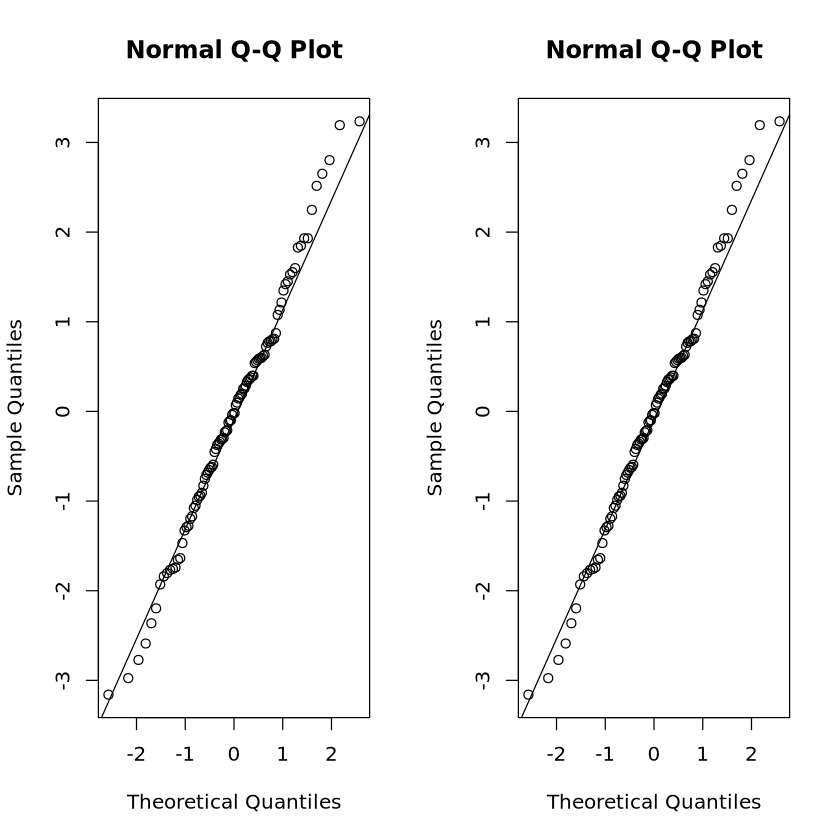

In [53]:
x <- qnorm(p_i)
y <- rt(100, 10)

par(mfcol = c(1, 2))
qqplot(x, y, xlab = "Theoretical Quantiles", ylab = "Sample Quantiles", main = "Normal Q-Q Plot")
qqline(y)

qqnorm(y)
qqline(y)  ## have no another sample

## logically same

* 지수분포의 확률플롯

In [20]:
n = 100
p_i <- seq(0.5/n, (n-0.5)/n, length = n)

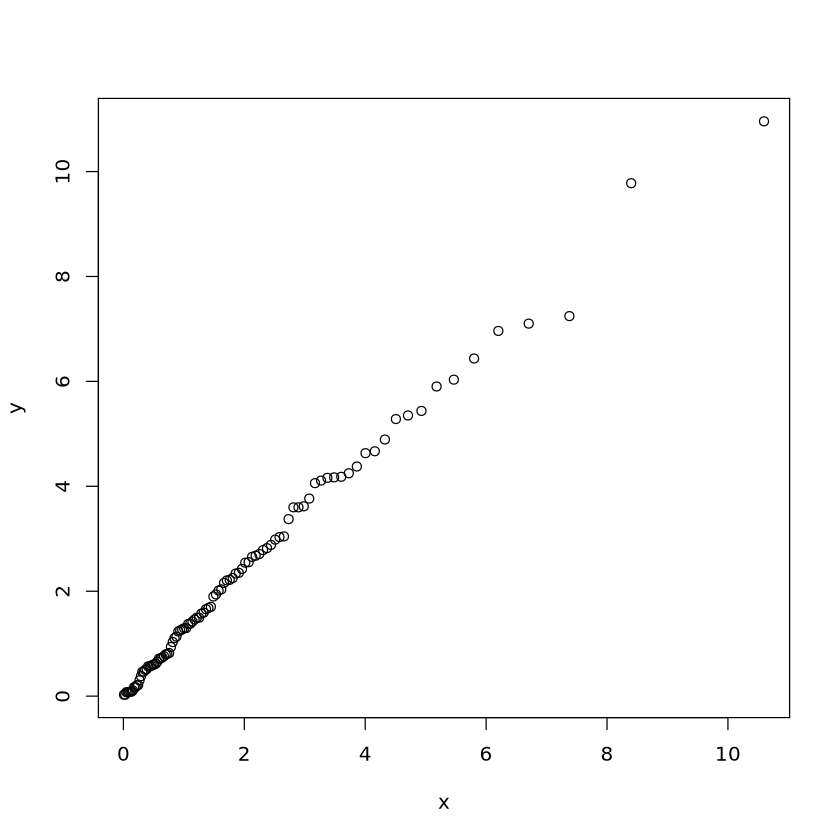

In [72]:
x <- qexp(p_i, 0.5)
y <- rgamma(100, 1.2, 0.5)

qqplot(x, y)

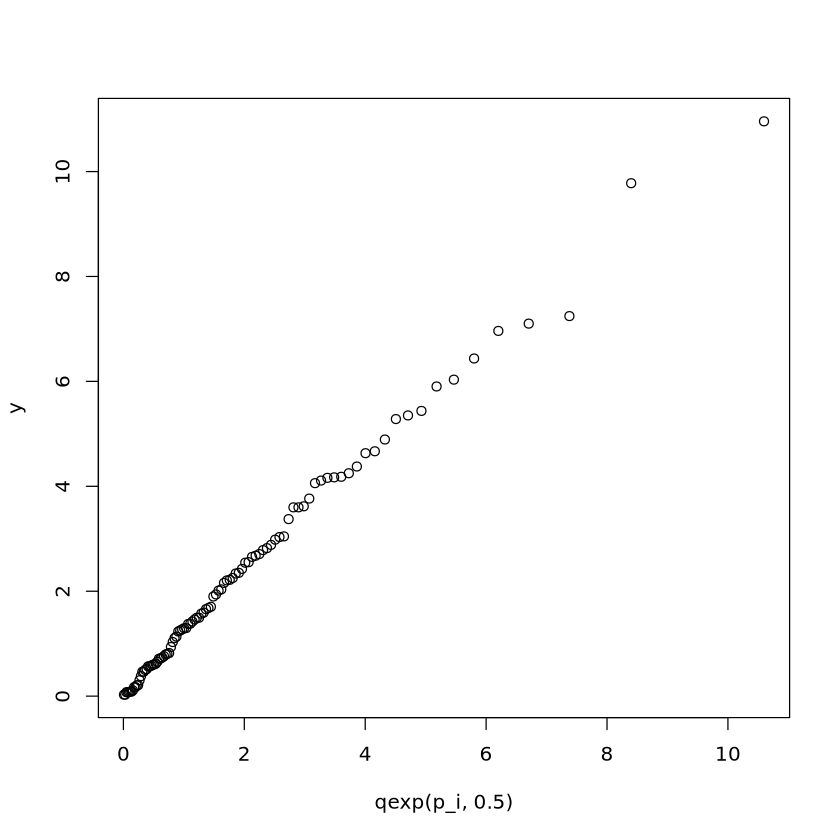

In [73]:
qqplot(qexp(p_i, 0.5), y)

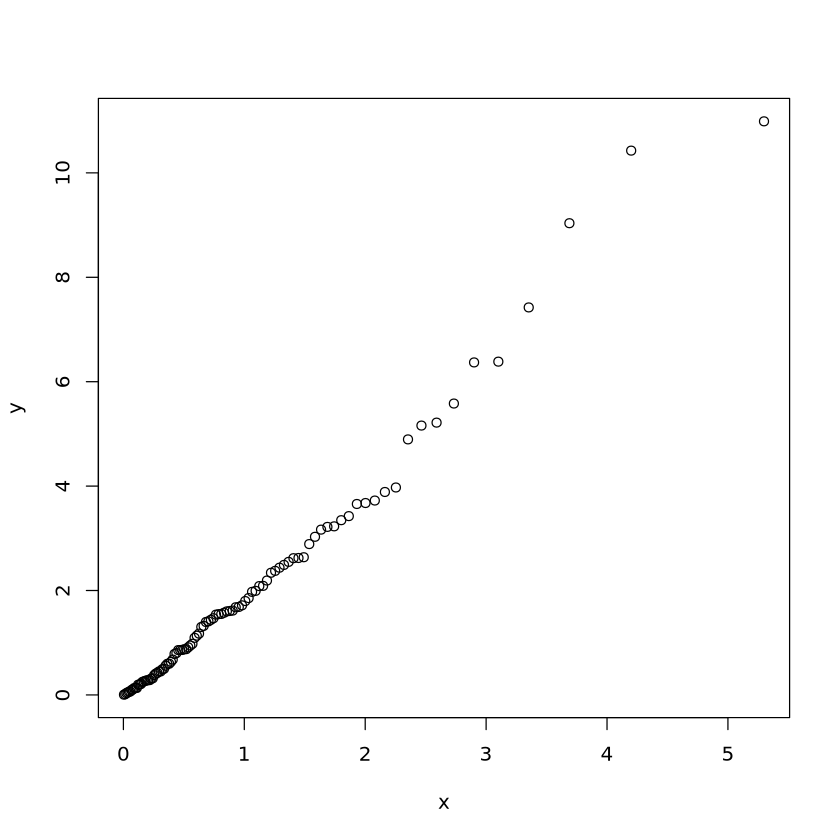

In [86]:
x <- -log(1-p_i)
y <- rgamma(100, 1, 0.5)

qqplot(x, y)